## **실습리포트11**



*   이름: 유성민
*   학과: 생명환경공학전공
*   학번: 2019110881

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import Flatten
import matplotlib.pyplot as plt

## **IMDB 감성분류**

- 문제: Internet movie database dataset 으로 50000개의 리뷰를 positive와 negative로 구분하기(감성분석)

- 결과: 정확도 87.5% 가량의 성능으로 positive와 negative로 분류한다.


In [ ]:
#데이터 다운로드

from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000,
                                                                     start_char=None,
                                                                     oov_char=1,
                                                                     index_from=1)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
print(len(train_data[0]))
print(np.array(train_data[0]))

217
[  12   20   14   41  528  971 1620 1383   63  456 4466   64 3939    2
  171   34  254    3   23   98   41  836  110   48  668    1    7   33
  478  282    3  148    2  170  110  165    1  334  383   37    2  170
 4534 1109   15  544   36   11  445    2  190   48   14    4  145 2023
   17   12   20    2 1918 4611  467    2   20   69   85   10   14   41
  528   36   74   13   11 1245    2   20   15  513   15   10   14  624
   16    1    3   60  384   10    6  314    6  104    3    2 2221 5242
   14  478   64 3783   31    2  128   10   14   36  617    3   23  122
   49   34  133   46   23 1413   31    4   20   10  213   26   75   50
    3   12  405   14   80    1    6    2  105  115 5950   13  254    2
    1    5 3764    3  721   34   69   41  528  474   24  398  315   44
    5    2    1 1027   11  102   86    2  379   13  295   96   30 2069
   54   24  139    4  192 7484   16    2  224   20   19  132  474   24
  478    3  142   28 5533   16   49   34   26  222   90   23  102    2
  

In [ ]:
print('train데이터:', len(train_labels))
print('test데이터:', len(test_labels))

train데이터: 25000
test데이터: 25000


In [ ]:
lengths=np.array([len(x) for x in train_data])
print(np.min(lengths))
print(np.max(lengths))
print(np.mean(lengths))

print(max([max(x) for x in train_data]))

10
2493
237.71364
9999


In [ ]:
#단어사전

word_index=imdb.get_word_index()
print(len(word_index))
print(word_index)

1641221/1641221 [==============================] - 0s 0us/step
88584
{'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007, 'sonja': 16816, 'vani': 63951, 'woods': 1408, 'spiders': 16115, 'hanging': 2345, 'woody': 2289, 'trawling': 52008, "hold's": 52009, 'comically': 11307, 'localized': 40830, 'disobeying': 30568, "'royale": 52010, "harpo's": 40831, 'canet': 52011, 'aileen': 19313, 'acurately': 52012, "diplomat's": 52013, 'rickman': 25242, 'arranged': 6746, 'rumbustious': 52014, 'familiarness': 52015, "spider'": 52016, 'hahahah': 68804, "wood'": 52017, 'transvestism': 40833, "hangin'": 34702, 'bringing': 2338, 'seamier': 40834, 'wooded': 34703, 'bravora': 52018, 'grueling': 16817, 'wooden': 1636, 'wednesday': 16818, "'prix": 52019, 'altagracia': 34704, 'circuitry': 52020, 'crotch': 11585, 'busybody': 57766, "tart'n'tangy": 52021, 'burgade': 14129, 'thrace': 52023, "tom's": 11038, 'snuggles': 52025, 'francesco': 29114, 'complainers': 52027, 'templarios': 52125, '272': 40835, '273': 52028,

In [ ]:
#역단어사전

reverse_word_index=dict((i, word) for (word, i ) in word_index.items())
print(dict(sorted(reverse_word_index.items())))

{1: 'the', 2: 'and', 3: 'a', 4: 'of', 5: 'to', 6: 'is', 7: 'br', 8: 'in', 9: 'it', 10: 'i', 11: 'this', 12: 'that', 13: 'was', 14: 'as', 15: 'for', 16: 'with', 17: 'movie', 18: 'but', 19: 'film', 20: 'on', 21: 'not', 22: 'you', 23: 'are', 24: 'his', 25: 'have', 26: 'he', 27: 'be', 28: 'one', 29: 'all', 30: 'at', 31: 'by', 32: 'an', 33: 'they', 34: 'who', 35: 'so', 36: 'from', 37: 'like', 38: 'her', 39: 'or', 40: 'just', 41: 'about', 42: "it's", 43: 'out', 44: 'has', 45: 'if', 46: 'some', 47: 'there', 48: 'what', 49: 'good', 50: 'more', 51: 'when', 52: 'very', 53: 'up', 54: 'no', 55: 'time', 56: 'she', 57: 'even', 58: 'my', 59: 'would', 60: 'which', 61: 'only', 62: 'story', 63: 'really', 64: 'see', 65: 'their', 66: 'had', 67: 'can', 68: 'were', 69: 'me', 70: 'well', 71: 'than', 72: 'we', 73: 'much', 74: 'been', 75: 'bad', 76: 'get', 77: 'will', 78: 'do', 79: 'also', 80: 'into', 81: 'people', 82: 'other', 83: 'first', 84: 'great', 85: 'because', 86: 'how', 87: 'him', 88: 'most', 89: "don

In [ ]:
#역단어 사전 만들기

reverse_word_index=dict((i+1, word) for (word, i) in word_index.items())
reverse_word_index[1]="<OOV>"

In [ ]:
#역단어 사전으로 원본텍스트 생성

decoded_review="".join(reverse_word_index[i] for i in train_data[0])
print(decoded_review)

thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert<OOV>isanamazingactorandnowthesamebeingdirector<OOV>fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor<OOV>andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso<OOV>tothetwolittleboy'sthatplayedthe<OOV>ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe<OOV>listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall


In [ ]:
#데이터 벡터화

def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, x in enumerate(sequences):
    results[i, x] = 1.
  return results

In [ ]:
#데이터셋 만들기

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
y_train=np.array(train_labels)
y_test=np.array(test_labels)
print(x_train[0])
print(y_train[0])

[0. 1. 1. ... 0. 0. 0.]
1


In [ ]:
#모델 정의

model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
#모델 컴파일

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#모델 훈련

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=10)

Epoch 1/10
782/782 [==============================] - 15s 12ms/step - loss: 0.3268 - accuracy: 0.8609 - val_loss: 0.3066 - val_accuracy: 0.8754
Epoch 2/10
782/782 [==============================] - 6s 7ms/step - loss: 0.1904 - accuracy: 0.9276 - val_loss: 0.3228 - val_accuracy: 0.8736
Epoch 3/10
782/782 [==============================] - 6s 8ms/step - loss: 0.1444 - accuracy: 0.9437 - val_loss: 0.3633 - val_accuracy: 0.8673
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.1025 - accuracy: 0.9602 - val_loss: 0.4484 - val_accuracy: 0.8616
Epoch 5/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0671 - accuracy: 0.9742 - val_loss: 0.5012 - val_accuracy: 0.8596
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 0.0413 - accuracy: 0.9849 - val_loss: 0.6229 - val_accuracy: 0.8609
Epoch 7/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0310 - accuracy: 0.9892 - val_loss: 0.7899 - val_accuracy: 0.8554
Epoc

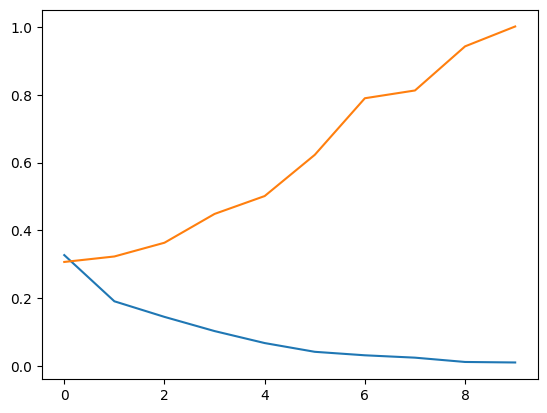

In [ ]:
#모델 평가

loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.show()

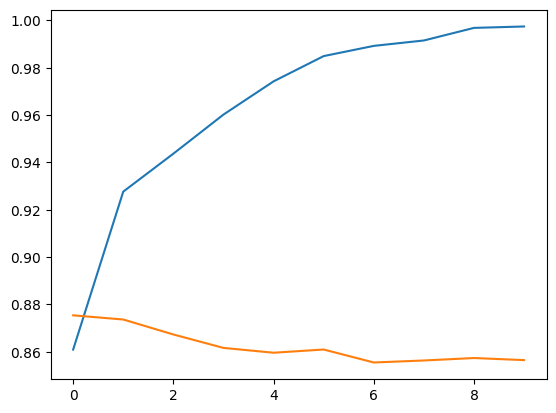

In [ ]:
#training accuarcy & validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc)
plt.plot(val_acc)
plt.show()

In [ ]:
print(val_acc)

[0.8753600120544434, 0.8736000061035156, 0.8672800064086914, 0.8615999817848206, 0.8595600128173828, 0.8609200119972229, 0.8554400205612183, 0.8562800288200378, 0.8573200106620789, 0.856440007686615]


## **IMDB 감성분류 & 임베딩 벡터**

- 문제: 임베딩 벡터를 사용해서 IMDB를 분류하기

- 결과: 정확도 87.8% 정도로 원핫인코딩을 사용했을 때보다 0.3% 정도 정확도가 상승했음을 확인하였다.

In [ ]:
#텍스트 데이터 만들기

from keras.preprocessing.sequence import pad_sequences

emb_x_train=pad_sequences(train_data, maxlen=250)
emb_x_test=pad_sequences(test_data, maxlen=250)
emb_y_train=np.array(train_labels)
emb_y_test=np.array(test_labels)

In [ ]:
#모델 정의

emb_model=Sequential([
    Embedding(input_dim=10000, output_dim=16, input_length=250),
    Flatten(),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
#모델 컴파일

emb_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
#모델 훈련


emb_history = emb_model.fit(emb_x_train, emb_y_train,
                    validation_data=(emb_x_test, emb_y_test),
                    epochs=10)

Epoch 1/10
782/782 [==============================] - 65s 82ms/step - loss: 0.4232 - accuracy: 0.7868 - val_loss: 0.2859 - val_accuracy: 0.8787
Epoch 2/10
782/782 [==============================] - 15s 20ms/step - loss: 0.1714 - accuracy: 0.9383 - val_loss: 0.3017 - val_accuracy: 0.8757
Epoch 3/10
782/782 [==============================] - 11s 14ms/step - loss: 0.0613 - accuracy: 0.9849 - val_loss: 0.3579 - val_accuracy: 0.8689
Epoch 4/10
782/782 [==============================] - 7s 10ms/step - loss: 0.0170 - accuracy: 0.9973 - val_loss: 0.4146 - val_accuracy: 0.8676
Epoch 5/10
782/782 [==============================] - 10s 12ms/step - loss: 0.0047 - accuracy: 0.9996 - val_loss: 0.4651 - val_accuracy: 0.8678
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.5034 - val_accuracy: 0.8674
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 6.7884e-04 - accuracy: 1.0000 - val_loss: 0.5370 - val_accuracy:

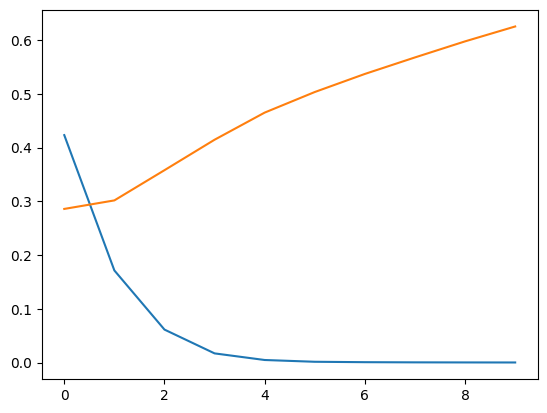

In [ ]:
#모델 평가

emb_loss=emb_history.history['loss']
emb_val_loss=emb_history.history['val_loss']
plt.plot(emb_loss)
plt.plot(emb_val_loss)
plt.show()

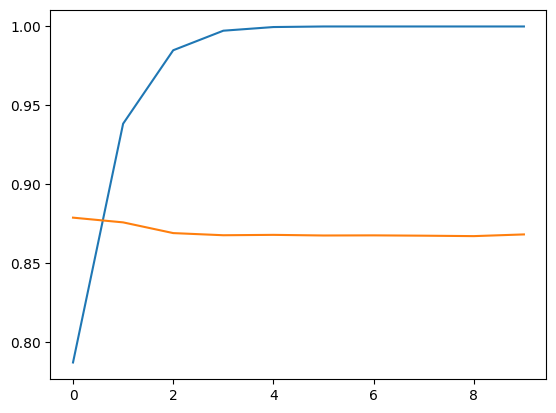

In [ ]:
#training accuarcy & validation accuracy

emb_acc = emb_history.history['accuracy']
emb_val_acc = emb_history.history['val_accuracy']
plt.plot(emb_acc)
plt.plot(emb_val_acc)
plt.show()

In [ ]:
print(emb_val_acc)

[0.8787199854850769, 0.8757200241088867, 0.8689200282096863, 0.8675600290298462, 0.8677999973297119, 0.8673999905586243, 0.8674799799919128, 0.8672800064086914, 0.8669999837875366, 0.8680800199508667]


## **임베딩 벡터의 weight값**

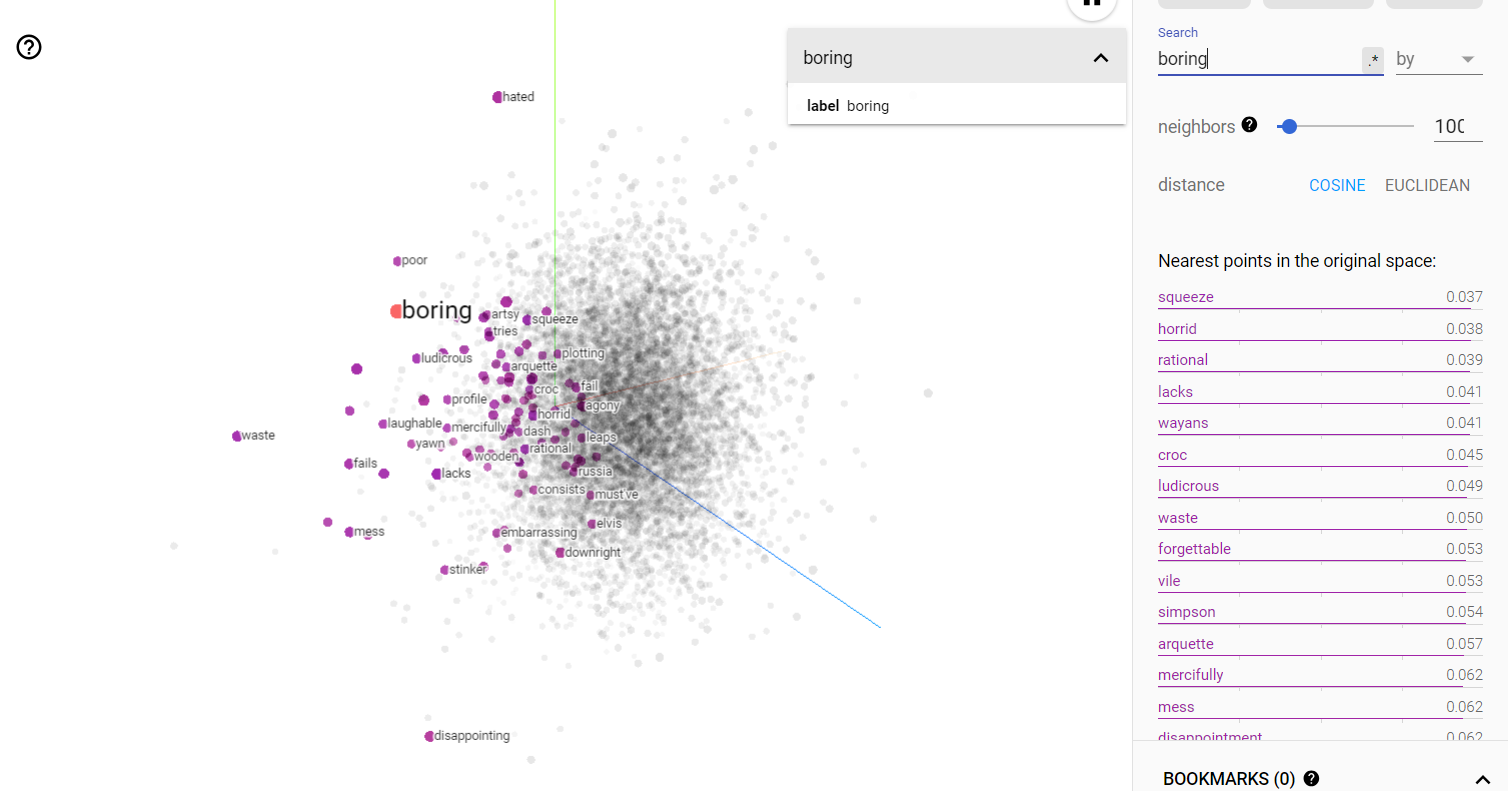

In [ ]:
e=emb_model.layers[0]
weights=e.get_weights()[0]
print(weights.shape)

(10000, 16)


In [ ]:
import io

out_v=io.open('vecs.tsv', 'w', encoding='utf-8')
out_m=io.open('meta.tsv', 'w', encoding='utf-8')
vocab_size=10000

for i in range(1, vocab_size):
  word=reverse_word_index[i]
  embeddings=weights[i]
  out_m.write(word+ "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()